# The Principles of Statistical Modelling
Before we start discussing simple and multiple regression, it is worth taking some time to understand what we are trying to achieve at a much higher level. Both *simple* and *multiple* regression are examples of *statistical models*. Although your prior experiences may have left the impression that statistics is about *hypothesis tests*, the reality is that statistics is a science concerned with building *models* of data. This concept of model building is *fundamental* to a much deeper understanding of statistics and is fundamental to your success on the rest of this course. As such, we will spend some time here exploring what we mean by a statistical model before we go any further.

## Understanding Variance
The starting point for understanding statistical modelling is understanding that the purpose of a model is to capture *variance*. Variance is the basic currency of statistics. It is the fundamental information that data holds. As such, you need to make sure that you have a solid grasp on what *exactly* variance is.

### Defining Variance
Informally, the idea of variance is very simple. For a given set of data, we want to understand the reason why the measured values are different from each other. In other words, why does the data *vary*? If data did not vary, it would be constant. Every time we took a measurement we would get the same value. In this scenario, the data would be *perfectly predictable* and there would be no need for statistics. The fact that data *does* vary is therefore fundamental in order for statistics to operate.

As an example, consider the plot of all the measurements of `mpg` from the `mtcars` dataset[^foot1].

In [1]:
options(repr.plot.width=12, repr.plot.height=8)

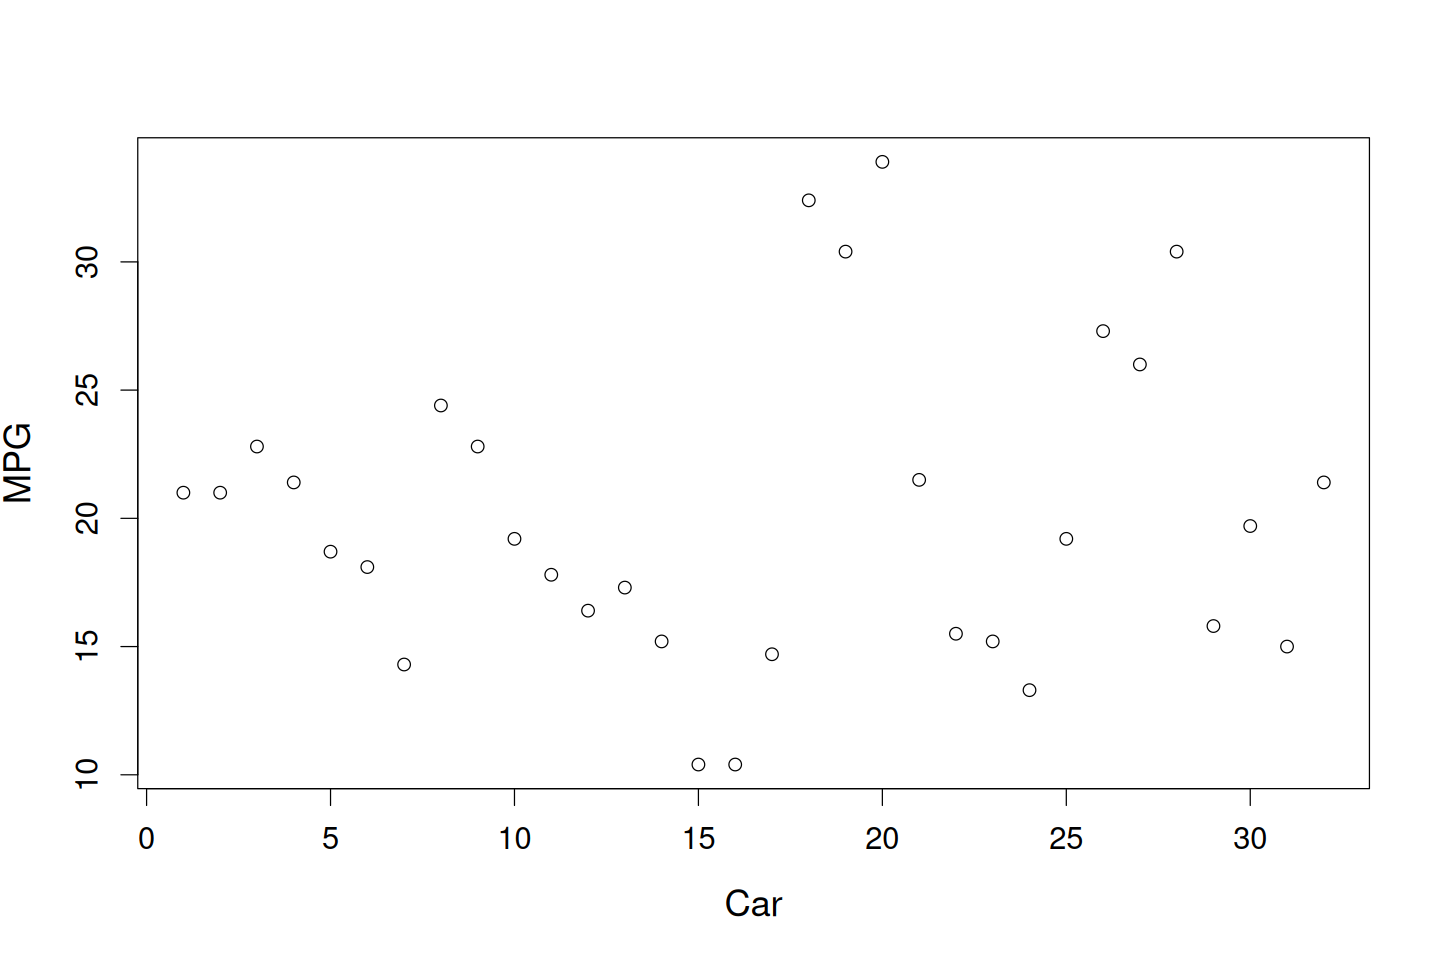

In [2]:
data('mtcars')
par(cex.lab=1.3, cex.axis=1.1, cex=1.4) # plot scaling
plot(x=seq(1,length(mtcars$mpg)), y=mtcars$mpg, xlab="Car", ylab="MPG")

Clearly, the values of `mpg` differ from car-to-car. This is expected, but take a moment to consider all the reasons *why* this is the case? 

```{admonition} Why do different cars have different MPG values?
:class: tip, dropdown
The most obvious answer here is that cars have different properties, such as their weight or their engine size. However, there will also be a degree of natural variation due to limitations in the precision of measurement. Importantly, some of these sources we can measures, whereas others we cannot. This is an important distinction within statistics and is sometimes known as *reducible* versus *irriducible* error.
```

By considering these different possibilities, you are effectively building your own mental model of the observed variance. All statistics does is formalise this process. 


### Measuring Variance
In order to start understanding the variance we can observe, we need some way of *quantifying* it. As mentioned above, our question is really about how far any set of data are from being *constant*. If we consider this to be the definition of *no variance*, then our measure must capture how far away our data are from a constant state. But what constant value should we pick for the comparisons? We could select something arbitrary (e.g. 0, 100, 1000), however (for reasons we will justify further below) the better choice is to use *the mean*.

To see this visually, the mean value of `mpg` is indicated as a horizontal line in the plot below.

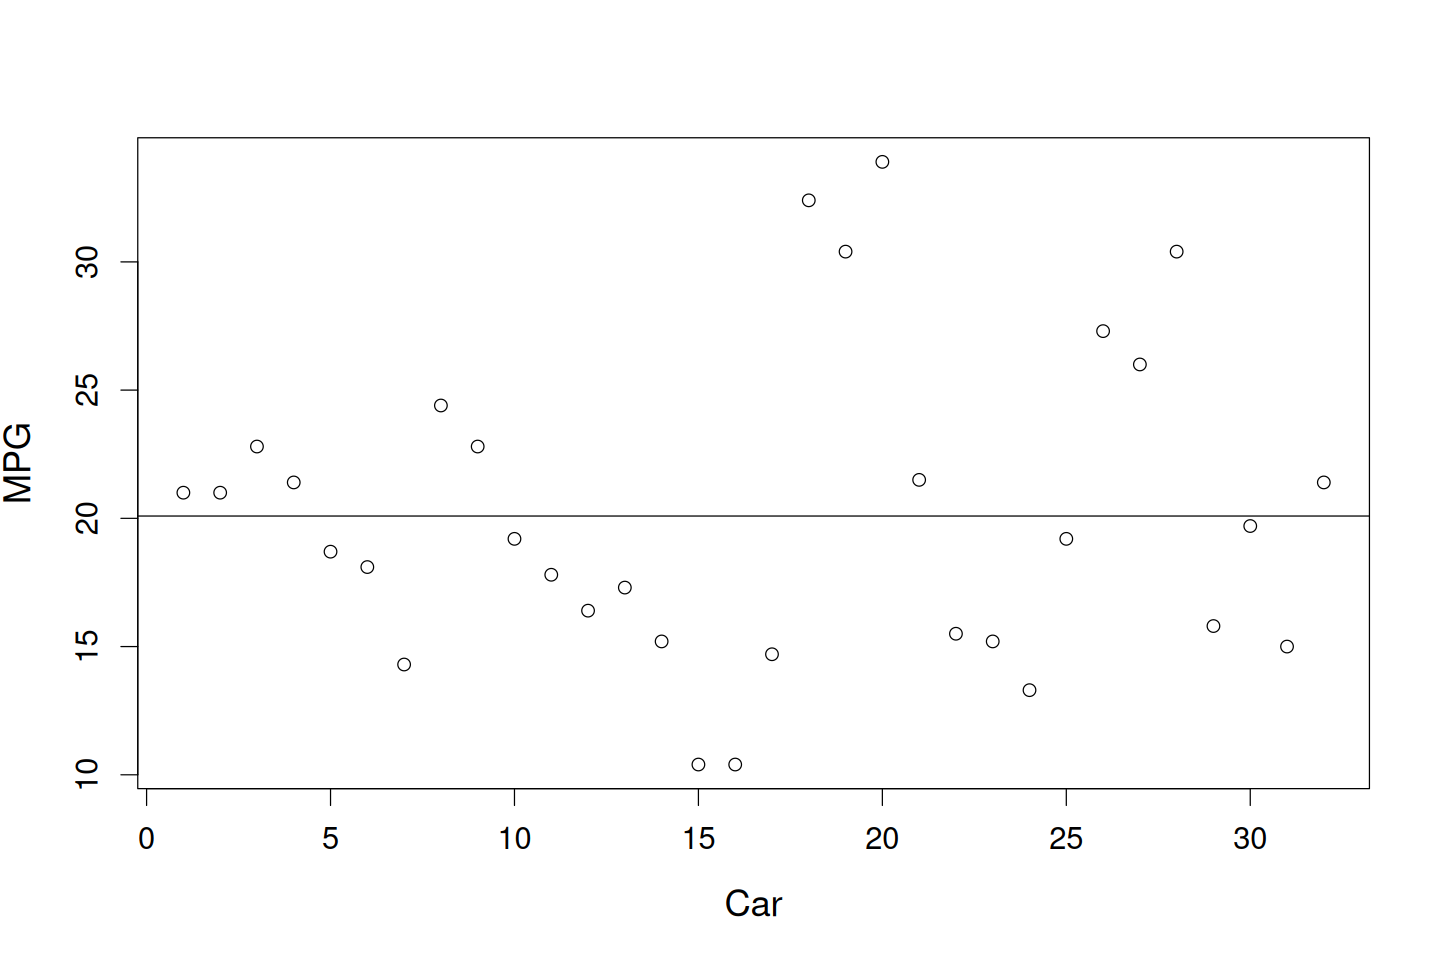

In [3]:
par(cex.lab=1.3, cex.axis=1.1, cex=1.4) # plot scaling
plot(x=seq(1,length(mtcars$mpg)), y=mtcars$mpg, xlab="Car", ylab="MPG")
abline(h=mean(mtcars$mpg))

The mean is therefore our *yardstick* to measure variation against. The vertical distances from the mean to each data point tells us how much variation there is to explain. For instance, the vertical distances for `mpg[1]` and `mpg[7]` are

In [4]:
mtcars$mpg[1] - mean(mtcars$mpg)
mtcars$mpg[7] - mean(mtcars$mpg)

[1] 0.909375

[1] -5.790625

So we can see that data-point 1 sits *above* the mean, whereas data-point 7 sits *below* the mean. 

In order to get an *overall* sense of the variation across all the cars, we might first think to *sum* these distances. However, if we do that then we get a result that is essentially 0

In [5]:
sum(mtcars$mpg - mean(mtcars$mpg))

[1] 1.421085e-14

The problem is that the mean is, by definition, *perfectly* in the middle of all the data and thus all the positve and negative distances will cancel and we will be left with nothing. Instead, we *square* the values[^foot2] before summing them

In [6]:
sum((mtcars$mpg - mean(mtcars$mpg))^2)

[1] 1126.047

This provides some indication of the variation in this data set, as it would be 0 if the data were constant. However, it is confounded by the fact that it is sensitive to the number of data points. For instance, we could get the same value from a data set with many data points near to the mean and a data set with a small number data points spread out from the mean. Our visual sense of variance does not depend on the amount of data, rather, it depends upon how far the data are from the mean *in general*. As such, the final step is to divide by the number of data points to produce an *average* squared distance from the mean.

In [7]:
sum((mtcars$mpg - mean(mtcars$mpg))^2) / length(mtcars$mpg)

[1] 35.18897

From this, we can conclude that average squared distance from the mean is $35.19$, which is our measure of the total amount of *variance* in this dataset. The only limitation is that the units of this measure are in $\text{MPG}^{2}$, which is a little hard to interpret. As such, it is typical to also take the square-root of this value

In [8]:
sqrt(sum((mtcars$mpg - mean(mtcars$mpg))^2) / length(mtcars$mpg))

[1] 5.93203

which tells us that, on average, there is a discrpency of around $5.93 \text{MPG}$ above and below the mean in these data. This is a value that should be familiar to you as the *standard deviation*. 

`````{admonition} Built-in functions
:class: tip
Although we calculated the variance and standard deviation manually here, it would be more typical to just use the `var()` and `sd()` functions in `R`. These will also correctly divide the sums by $n-1$ rather than $n$, which is a detail we omitted from the discussion above as this would require us to dive into the conecpt of *degrees of freedom*, which would then risk derailing the main point we were trying to make.
`````

## Probability Models
We have now established that *variance* is the key element of data that we wish to capture. This variation from data-point to data-point creates inherent *randomess* and *uncertainty* to the values that we are measuring. As such, in order to say anything about our data, we need some means of formalising this randomness. This formalisation comes from the field of *probability*, where *randomness* has a very specific definition.



### Random Variables

To get more of a handle on this concept, we can generate realisations of a random variable in `R`. All we need is to choose a distribution and set the parameters to some values. For instance, to generate 10 realisations of the random variable 

$$
y \sim \mathcal{N}\left(2,1\right)
$$

we can use

In [10]:
y <- rnorm(n=10, mean=2, sd=1)
y

[1] 2.0978639 2.6785043 3.0434812 1.9197725 2.2749596 2.1052806 2.3335018
 [8] 2.6639790 2.5415211 0.2168996

Every variable that we measure can therefore be conceptualised as a *random variable*, drawn from some distribution. This distribution represents the entire *population* of possible values we could measure, with some fixed values for its parameters. Our aim, very generally, is to figure out what those parameter values are, given the data we have available.



### Expected Values

The problem with random variation is that it seemingly has no structure and thus our ability to reach conclusions and make predictions would seem to be very limited.

We can think of the *mean* as a very basic model of the data. It is a model that predicts a constant value for `mpg` from every car. The degree to which this is not true indicates the degree to which the data is *not* constant and thus quantifies the raw amount of variance in the data.

### Normal Probability Models

$$
y \sim \mathcal{N}\left(\mu,\sigma^{2}\right)
$$

as such, the expected value of $y$ is

$$
E\left(y\right) = \mu
$$

and its variance is

$$
\begin{align*}
    \text{Var}\left(y\right) &= E\left[\left(y - E\left[y\right]\right)^{2}\right] \\ 
                             &= E\left[\left(y - \mu\right)^{2}\right]             \\
                             &= \sigma^{2}
\end{align*}
$$

### The Formal Definition of Variance

Formally, the variance of the *random variable* $x$ is defined as

$$
\text{Var}\left(x\right) = E\left[\left(x - E\left[x\right]\right)^{2}\right].
$$

This needs some unpacking to understand, but it is worth the effort because there are some important concepts hidden in this modest equation.

## Parametric Statistical Models

The fundamental elements of parametric statistical model are therefore:

- An assumed probability distribution for the data
- A mean function containing *parameters* that define the expected value of the distribution
- A variance function that captures the deviations from the expected value (the errors)

Our basic example of using the mean as a model would result in

$$
y_{i} \sim \mathcal{N}\left(\mu,\sigma\right)
$$

The mean of the distribution defines a degree of *structure* within the data, whereas the variance term captures the degree to which the data differs from this structure. For instance, the *mean* is a very simple model that captures the structure of the data in terms of its *scaling*. We can think of the mean as capturing the *constant offset from 0* inherent in the units of the data. Without any other information, this is the most we can say.

### The Modelling Process

```{figure} images/modelling-complete-v.png
---
width: 300px
name: modelling-fig
---
Flowchart of the general procedure for parametric statistical modelling.
```

### Linear Models
The vast majority of methods we will be considering on this course can be subsumed under the topic of Statistical Linear Models.


`````{topic} Section Summary
In this section, we have explored the general framework under which the vast majority of analyses in this course will be based.
`````

[^foot1]: The `mtcars` dataset is included with `R` and contains various measurements from a sample of cars. You can read more about it by typing `?mtcars` at the prompt.

[^foot2]: You might think that taking the *absolute value* of the data before summing would make more sense. This is a metric known as the *mean absolute deviation* (MAD), which is a perfectly legitimate way of measuring the *spread* of data around a central point. However, using squared values has some useful properties. Firstly, it *emphasises* larger distances in the sum, which emphasises the importance of bigger discrepancies from the mean. From a mathematical perspective, squares are also easier to work with and manipulate compared to something like the absolute value.